# Analysis of microbit motion sensor data

This Jupyter notebook shows how to analyse BBC micro:bit motion sensor data saved into a csv text file. 

I generated this data by fastening one microbit to my kettle as the water heated up then boiled. That microbit ran my logging program `microbit-logger.py` in `'tx'` mode to transmit csv data by radio. The data was received by a second microbit, which was connected to my computer via USB. This microbit ran `microbit-logger.py` in `'relay'` mode. Finally my computer ran `usb-receiver.py` redirecting output to the text file `data-kettle.csv`:

   ```$ python usb-receiver.py > data-kettle.csv```

The text file can be loaded most easily using `pandas`.

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
df = pd.read_csv('data.csv')
df['Time'] /= 1000.0    # Convert from ms (int) to sec (float)
df.set_index('Time', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5860 entries, 12.966 to 246.132
Data columns (total 8 columns):
AccX       5860 non-null int64
AccY       5860 non-null int64
AccZ       5860 non-null int64
MagX       5860 non-null int64
MagY       5860 non-null int64
MagZ       5860 non-null int64
Heading    5860 non-null int64
Gesture    3760 non-null object
dtypes: int64(7), object(1)
memory usage: 412.0+ KB


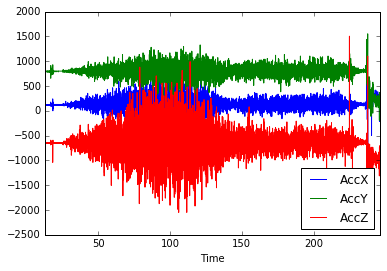

In [71]:
accXYZ = df[['AccX','AccY','AccZ']]
accXYZ.plot()

In [34]:
accXYZ = df[['AccX','AccY','AccZ']]
g = accXYZ[50.0:200.0].mean()
g

AccX    128.733753
AccY    802.477987
AccZ   -636.926625
dtype: float64

In [63]:
s = (accXYZ - g).pow(2).sum(axis=1)

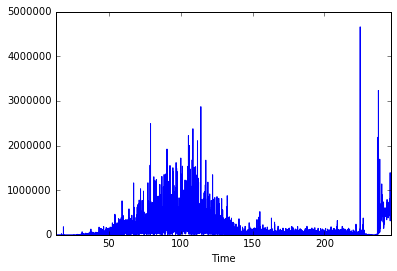

In [64]:
s.plot()

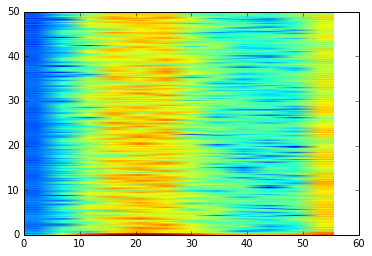

In [73]:
plt.specgram(s, NFFT=512, Fs=100, noverlap=32)[3]